In [41]:
library(ggplot2)
library(dplyr)

In [42]:
revision_folder = "/hps/nobackup2/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/May2021/REVISION/"

In [43]:
crm_int_file = paste0(revision_folder, "CRM_interaction_chr22/results_permG/summary.csv")
crm_int = read.csv(crm_int_file, row.names=1)
nrow(crm_int)
head(crm_int,2)

[1] 500

,gene,n_snps,chrom,pv_raw,snpID
0,RANBP1,2,22,0.02405386,22_19603943_C_G
1,RANBP1,2,22,0.06384516,22_19606703_A_G


In [44]:
genes = as.character(unique(crm_int$gene))
head(genes)
length(genes)

[1] "RANBP1" "YPEL1"  "MRPL40" "PPARA"  "SUN2"   "ARSA"

[1] 250

In [45]:
fvf_filename = paste0(revision_folder,"/CRM_interaction_chr22/fvf.csv")
fvf = read.csv(fvf_filename, row.names=1)
head(fvf)

feature,snpID,chrom
CECR5,22_17118461_C_T,22
CECR5,22_17118505_A_T,22
CECR5,22_17118618_T_C,22
CECR5,22_17118747_C_T,22
CECR5,22_17118882_C_A,22
CECR5,22_17118907_T_G,22


In [46]:
all_genes = unique(as.character(fvf$feature))
head(all_genes)
length(all_genes)

[1] "CECR5"    "CECR1"    "CECR2"    "ATP6V1E1" "BCL2L13"  "BID"

[1] 250

In [48]:
missing_genes = all_genes[!(all_genes %in% genes)]
length(missing_genes)
# as.character(unique(fvf[fvf$feature %in% missing_genes,"feature"]))

[1] 0

[1] 0.5076929

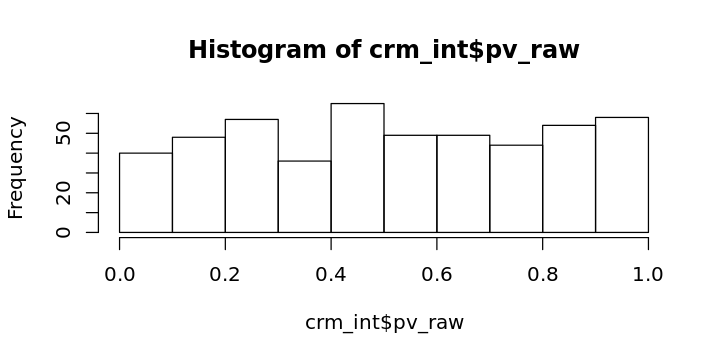

In [49]:
options(repr.plot.width=6, repr.plot.height=3)
median(crm_int$pv_raw)
hist(crm_int$pv_raw)

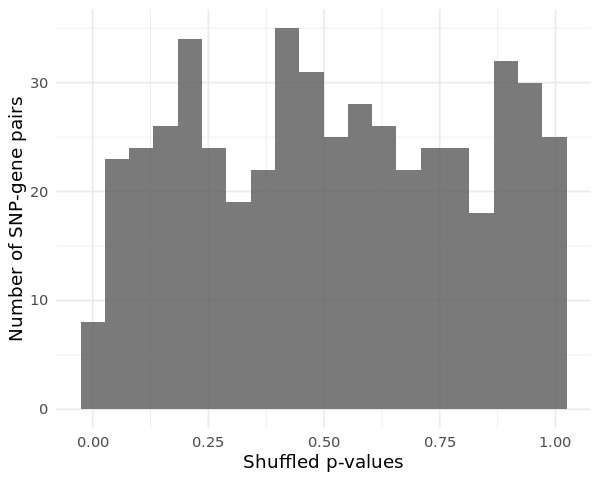

In [50]:
options(repr.plot.width=5, repr.plot.height=4)
ggplot(crm_int, aes(x=pv_raw)) + geom_histogram(alpha = 0.8, bins=20) + 
    xlab("Shuffled p-values") + 
    ylab("Number of SNP-gene pairs") + theme_minimal()

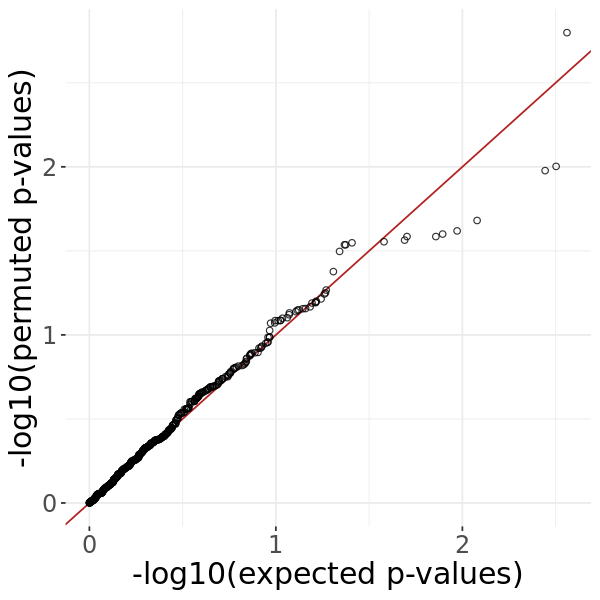

In [51]:
options(repr.plot.width=5, repr.plot.height=5)
crm_int$pv_uniform = runif(dim(crm_int)[1], min = 0, max = 1)
ggplot(crm_int, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(pv_raw)))) + 
    geom_abline(slope = 1, intercept = 0, col = "firebrick") +
    geom_point(alpha = 0.8, pch = 1) + xlab("-log10(expected p-values)") + ylab("-log10(permuted p-values)") +
    theme_bw() +# xlim(c(0,4)) + ylim(c(0,4)) +
    theme(legend.position="none", panel.border = element_blank()) + theme(text = element_text(size=18))